<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/04-21-2020.csv"

#https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/
#csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),\
  ['state', 'positive', 'negative', 'totalTestResults']].sort_values(by='positive', ascending=False).head(10)

,state,positive,negative,totalTestResults
37,NY,251690,397635,649325.0
34,NJ,92387,92439,184826.0
21,MA,41199,134173,175372.0
41,PA,34528,132323,166851.0
5,CA,33261,266839,300100.0
16,IL,33059,121938,154997.0
24,MI,32967,84259,117226.0
10,FL,27495,249564,277059.0
20,LA,24854,117576,142430.0
7,CT,20360,43832,64192.0


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA[['positive', 'totalTestResults', 'death', 'deathIncrease']].sum().reset_index().copy()
dfCAPos = gbCA[['positive', 'totalTestResults', 'death', 'deathIncrease']].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [43]:
dfUSAPos[-8:]

,date,positive,totalTestResults,death,deathIncrease,PCT
46,2020-04-14,602473,3081620.0,25668,2299.0,0.753358
47,2020-04-15,632656,3242755.0,28160,2492.0,0.791100
48,2020-04-16,663260,3401064.0,30296,2136.0,0.829368
49,2020-04-17,694520,3557493.0,32365,2069.0,0.868457
50,2020-04-18,722182,3698534.0,34139,1774.0,0.903047
51,2020-04-19,749203,3865864.0,35793,1654.0,0.936835
52,2020-04-20,772524,4003551.0,37321,1528.0,0.965997
53,2020-04-21,799717,4155178.0,39995,2674.0,1.000000


In [9]:
dfCAPos[-7:]

,date,positive,totalTestResults,death,deathIncrease,PCT
42,2020-04-15,24424,216486.0,821,63.0,0.734313
43,2020-04-16,26182,246400.0,890,69.0,0.787168
44,2020-04-17,27528,251614.0,985,95.0,0.827636
45,2020-04-18,28963,259666.0,1072,87.0,0.870780
46,2020-04-19,30333,280900.0,1166,94.0,0.911969
47,2020-04-20,30978,290500.0,1208,42.0,0.931361
48,2020-04-21,33261,300100.0,1268,60.0,1.000000


In [10]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-17,694520,2862973,10889,57858.0,77955.0,14910.0,2052.0,6096.0,148.0,44139.0,32365,77955.0,3568382,3557493.0,3557493.0,2069.0,3250.0,125169.0,31260.0,156429.0
2020-04-18,722182,2976352,9906,56575.0,78839.0,14788.0,2096.0,5729.0,205.0,51390.0,34139,78839.0,3708440,3698534.0,3698534.0,1774.0,3224.0,113379.0,27662.0,141041.0
2020-04-19,749203,3116661,11324,55565.0,80881.0,14548.0,2145.0,5603.0,214.0,53630.0,35793,80881.0,3877188,3865864.0,3865864.0,1654.0,2042.0,140309.0,27021.0,167330.0
2020-04-20,772524,3231027,4037,55509.0,82879.0,14691.0,2193.0,5567.0,214.0,54438.0,37321,82879.0,4007588,4003551.0,4003551.0,1528.0,1998.0,114366.0,23321.0,137687.0
2020-04-21,799717,3355461,3956,58468.0,84292.0,15228.0,2315.0,5514.0,214.0,58117.0,39995,84292.0,4159134,4155178.0,4155178.0,2674.0,1413.0,124434.0,27193.0,151627.0


In [11]:
gbCA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-17,27528,224086,7200,4892.0,0.0,1484.0,0.0,0.0,0.0,0.0,985,0.0,258814,251614.0,251614.0,95.0,0.0,3868.0,1346.0,5214.0
2020-04-18,28963,230703,7200,4936.0,0.0,1490.0,0.0,0.0,0.0,0.0,1072,0.0,266866,259666.0,259666.0,87.0,0.0,6617.0,1435.0,8052.0
2020-04-19,30333,250567,7200,4731.0,0.0,1457.0,0.0,0.0,0.0,0.0,1166,0.0,288100,280900.0,280900.0,94.0,0.0,19864.0,1370.0,21234.0
2020-04-20,30978,259522,0,4674.0,0.0,1480.0,0.0,0.0,0.0,0.0,1208,0.0,290500,290500.0,290500.0,42.0,0.0,8955.0,645.0,9600.0
2020-04-21,33261,266839,0,4886.0,0.0,1502.0,0.0,0.0,0.0,0.0,1268,0.0,300100,300100.0,300100.0,60.0,0.0,7317.0,2283.0,9600.0


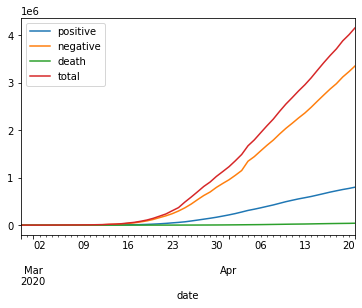

In [12]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

In [13]:
dfWHO[-14:]

,confirmed,who_deaths
date,,
2020-04-08,363321,10845
2020-04-09,395939,12740
2020-04-10,425889,14665
2020-04-11,461275,16596
2020-04-12,492881,18516
2020-04-13,524514,20444
2020-04-14,553822,21972
2020-04-15,578268,23476
2020-04-16,604070,25871


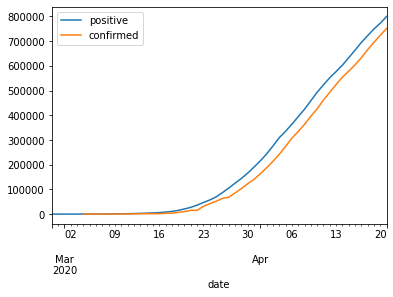

In [14]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [15]:
gbCA.sum()[-7:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-04-15,24424,192062,13200,5163.0,0.0,1175.0,0.0,0.0,0.0,0.0,821,0.0,229686,216486.0,216486.0,63.0,0.0,13192.0,1086.0,14278.0
2020-04-16,26182,220218,13200,5031.0,0.0,1568.0,0.0,0.0,0.0,0.0,890,0.0,259600,246400.0,246400.0,69.0,0.0,28156.0,1758.0,29914.0
2020-04-17,27528,224086,7200,4892.0,0.0,1484.0,0.0,0.0,0.0,0.0,985,0.0,258814,251614.0,251614.0,95.0,0.0,3868.0,1346.0,5214.0
2020-04-18,28963,230703,7200,4936.0,0.0,1490.0,0.0,0.0,0.0,0.0,1072,0.0,266866,259666.0,259666.0,87.0,0.0,6617.0,1435.0,8052.0
2020-04-19,30333,250567,7200,4731.0,0.0,1457.0,0.0,0.0,0.0,0.0,1166,0.0,288100,280900.0,280900.0,94.0,0.0,19864.0,1370.0,21234.0
2020-04-20,30978,259522,0,4674.0,0.0,1480.0,0.0,0.0,0.0,0.0,1208,0.0,290500,290500.0,290500.0,42.0,0.0,8955.0,645.0,9600.0
2020-04-21,33261,266839,0,4886.0,0.0,1502.0,0.0,0.0,0.0,0.0,1268,0.0,300100,300100.0,300100.0,60.0,0.0,7317.0,2283.0,9600.0


In [16]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    823786
dead          44845
dtype: int64

In [17]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    35465
dead          1282
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                823786
Spain             204178
Italy             183957
France            159297
Germany           148291
United Kingdom    130172
Turkey             95591
Iran               84802
China              83853
Russia             52763
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [24]:
dfState.loc['FL'].head(7)

,date,positive,current_total,pct
state,,,,
FL,2020-04-21,27495,27495,1.000000
FL,2020-04-20,26660,27495,0.969631
FL,2020-04-19,25996,27495,0.945481
FL,2020-04-18,25269,27495,0.919040
FL,2020-04-17,24119,27495,0.877214
FL,2020-04-16,22897,27495,0.832770
FL,2020-04-15,22511,27495,0.818731


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

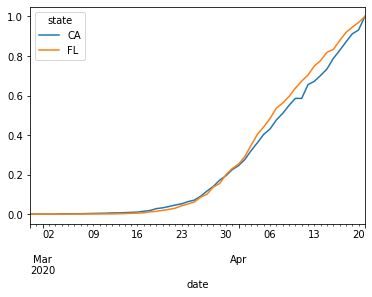

In [26]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

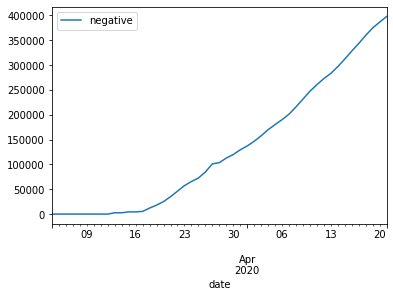

In [28]:
x = dfNYTesting.plot.line()

In [29]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,current_total,pct
464,FL,2020-04-21,27495,27495,1.000000
465,FL,2020-04-20,26660,27495,0.969631
466,FL,2020-04-19,25996,27495,0.945481
467,FL,2020-04-18,25269,27495,0.919040
468,FL,2020-04-17,24119,27495,0.877214
469,FL,2020-04-16,22897,27495,0.832770
470,FL,2020-04-15,22511,27495,0.818731
471,FL,2020-04-14,21367,27495,0.777123
472,FL,2020-04-13,20601,27495,0.749264
473,FL,2020-04-12,19355,27495,0.703946


In [30]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=3)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .7)].sort_values(by='pct')


,state,date,positive,current_total,pct
648,IA,2020-04-18,2513,3641,0.690195
1489,NE,2020-04-18,1138,1648,0.690534


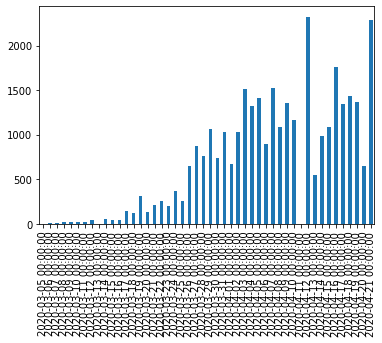

In [31]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar()



# Added State Data

In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [34]:
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")

positive     799717
negative    3355461
pending        3956
death         39995
total       4159134
dtype: int64
Current Infection Rate 19.227969%
Percentage of US affected: 0.255823%
Percentage of US tested/affected: 1.278083%


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [71]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.293799,3.337821
NJ,1.040138,2.080861
MA,0.597736,2.544388
CT,0.571062,1.800472
LA,0.534633,3.063805
RI,0.519181,3.712899
DC,0.438966,2.116758
MI,0.330104,1.173803
DE,0.300997,1.710476


In [70]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 1.265898%
